<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Missing Values**


Estimated time needed: **30** minutes


Data wrangling is the process of cleaning, transforming, and organizing data to make it suitable for analysis. Finding and handling missing values is a crucial step in this process to ensure data accuracy and completeness. In this lab, you will focus exclusively on identifying and handling missing values in the dataset.


## Objectives


After completing this lab, you will be able to:


-   Identify missing values in the dataset.

- Quantify missing values for specific columns.

- Impute missing values using various strategies.


## Hands on Lab


##### Setup: Install Required Libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

##### Import Necessary Modules:


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Tasks


<h2>1. Load the Dataset</h2>
<p>
We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:



In [10]:
# Define the URL of the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

### 2. Explore the Dataset
##### Task 1: Display basic information and summary statistics of the dataset.


In [11]:
# Display basic information about the dataset
print("Basic Information:")
print(df.info())

# Display summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())


Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB
None

Summary Statistics:
         ResponseId      CompTotal       WorkExp  JobSatPoints_1  \
count  65437.000000   3.374000e+04  29658.000000    29324.000000   
mean   32719.000000  2.963841e+145     11.466957       18.581094   
std    18890.179119  5.444117e+147      9.168709       25.966221   
min        1.000000   0.000000e+00      0.000000        0.000000   
25%    16360.000000   6.000000e+04      4.000000        0.000000   
50%    32719.000000   1.100000e+05      9.000000       10.000000   
75%    49078.000000   2.500000e+05     16.000000       22.000000   
max    65437.000000  1.000000e+150     50.000000      100.000000   

       JobSatPoints_4  JobSatPoints_5  JobSatPoints_6  JobSatPoints_7  \
count    29393.000000    29411.000000    29450.000000     29448.00000   
mean       

### 3. Finding Missing Values
##### Task 2: Identify missing values for all columns.


In [12]:
# Identify missing values for all columns
missing_values = df.isnull().sum()

# Display the number of missing values for each column
print("Missing Values for Each Column:")
print(missing_values)


Missing Values for Each Column:
ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64


##### Task 3: Visualize missing values using a heatmap (Using seaborn library).



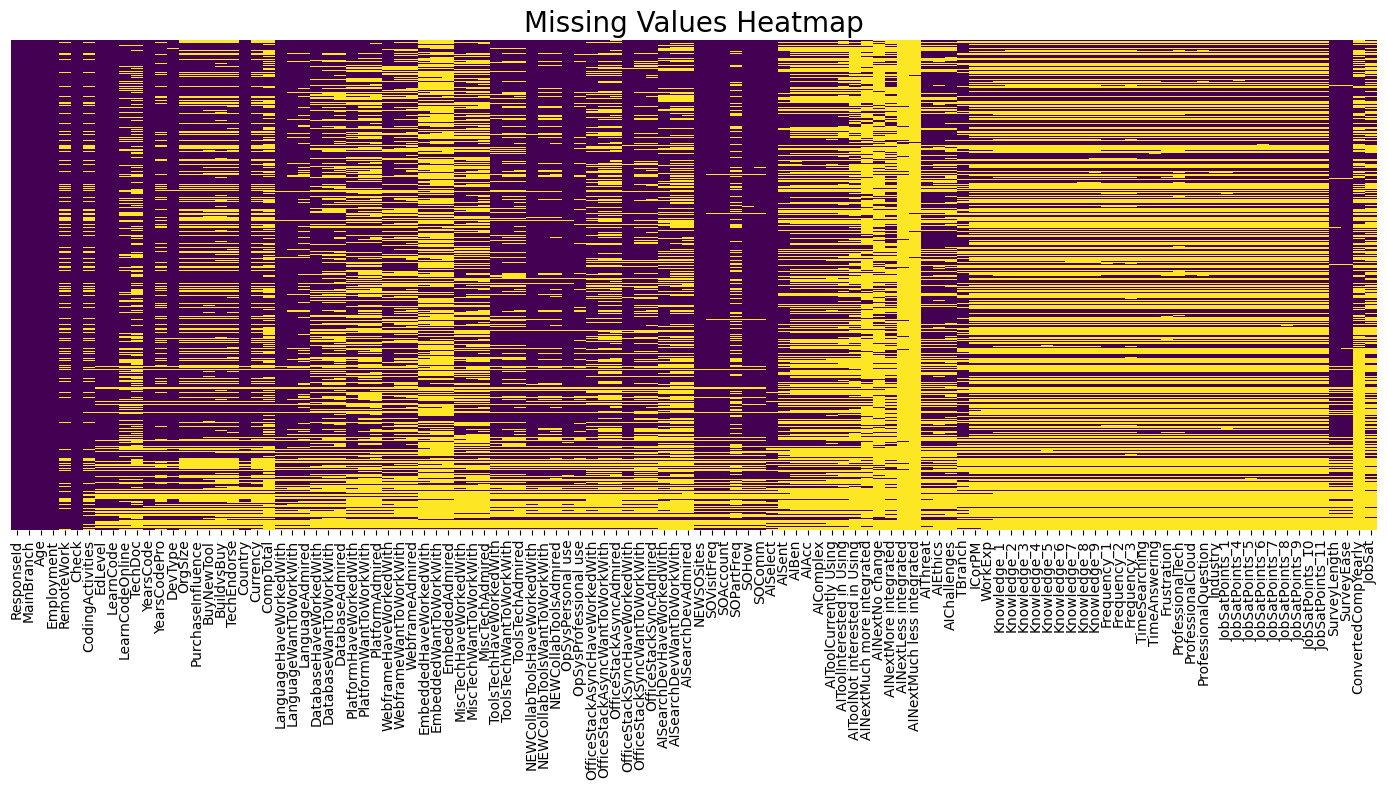

In [13]:
plt.figure(figsize=(14, 8))

# Create a heatmap to visualize missing values
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False, xticklabels=True)

# Add title for clarity
plt.title('Missing Values Heatmap', fontsize=20)

# Adjust layout to avoid overlapping elements
plt.tight_layout()

# Display the plot
plt.show()

##### Task 4: Count the number of missing rows for a specific column (e.g., `Employment`).


In [14]:
# Count the number of missing values in the 'Employment' column
missing_employment = df['Employment'].isnull().sum()

# Display the result
print(f"Number of missing rows in 'Employment' column: {missing_employment}")


Number of missing rows in 'Employment' column: 0


### 4. Imputing Missing Values
##### Task 5: Identify the most frequent (majority) value in a specific column (e.g., `Employment`).


In [15]:
# Find the most frequent (majority) value in the 'Employment' column
most_frequent_employment = df['Employment'].mode()[0]

# Display the result
print(f"The most frequent value in the 'Employment' column is: {most_frequent_employment}")


The most frequent value in the 'Employment' column is: Employed, full-time


##### Task 6: Impute missing values in the `Employment` column with the most frequent value.



In [16]:
# Impute missing values in 'Employment' column with the most frequent value
df['Employment'] = df['Employment'].fillna(most_frequent_employment)

# Display the number of missing values in 'Employment' column after imputation to confirm
missing_employment_after_imputation = df['Employment'].isnull().sum()
print(f"Number of missing rows in 'Employment' column after imputation: {missing_employment_after_imputation}")

Number of missing rows in 'Employment' column after imputation: 0


### 5. Visualizing Imputed Data
##### Task 7: Visualize the distribution of a column after imputation (e.g., `Employment`).


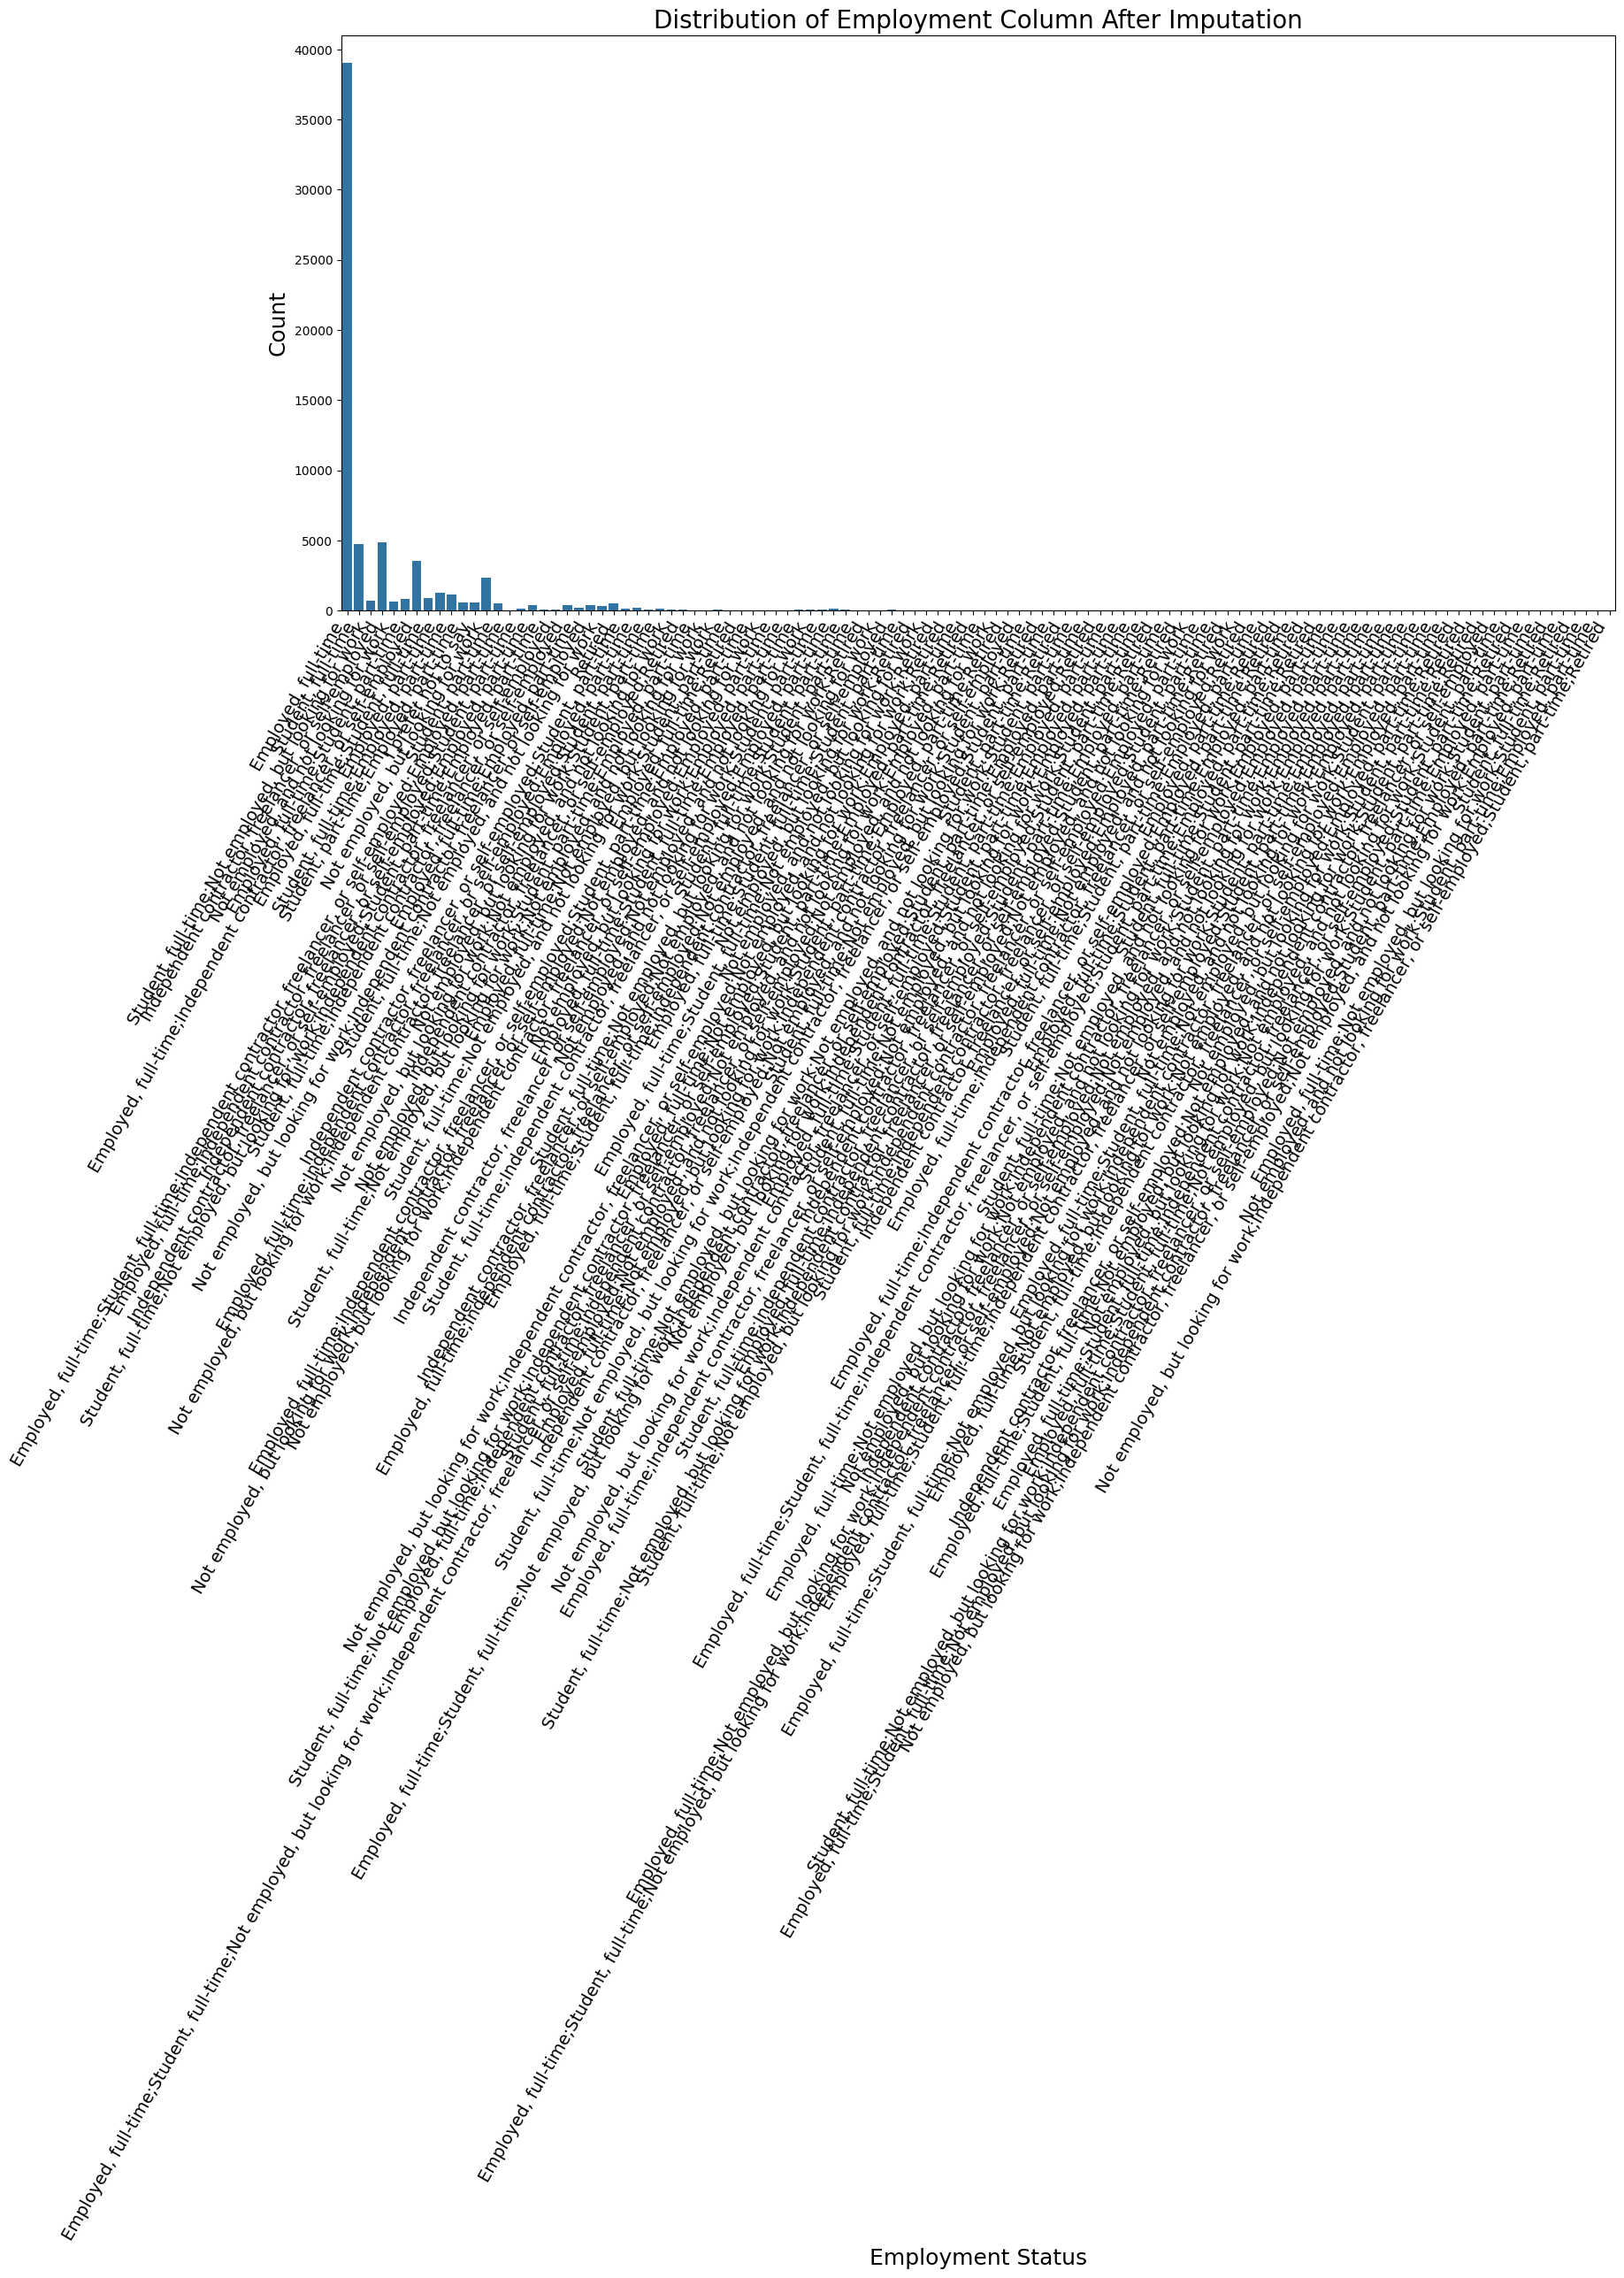

In [21]:
# Create a larger figure to ensure everything fits
plt.figure(figsize=(18, 10))  # Increase the figure size even more

# Create the count plot for 'Employment' distribution
sns.countplot(x='Employment', data=df)

# Add title and labels with larger font sizes
plt.title('Distribution of Employment Column After Imputation', fontsize=20)
plt.xlabel('Employment Status', fontsize=18)
plt.ylabel('Count', fontsize=18)

# Rotate x-axis labels further to prevent overlap, and make the font size larger
plt.xticks(rotation=60, ha='right', fontsize=14)

# Adjust margins even further
plt.subplots_adjust(bottom=0.25, top=0.9, left=0.1, right=0.9)

# Display the plot
plt.show()

### Summary


In this lab, you:
- Loaded the dataset into a pandas DataFrame.
- Identified missing values across all columns.
- Quantified missing values in specific columns.
- Imputed missing values in a categorical column using the most frequent value.
- Visualized the imputed data for better understanding.
  


Copyright © IBM Corporation. All rights reserved.
